## Application du Cours Validation de modèle sur OpenClassroom

- Importation des Package

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
sns.set()

 - Chargement du Data set Aperçu des données

In [3]:
data = pd.read_csv('wine.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- Selection des Variable X et Y

In [28]:
X1 = data.drop('quality',axis=1)
y = data['quality'].values
X = data[data.columns[:-1]].values

- Histogramme pour chaque variable

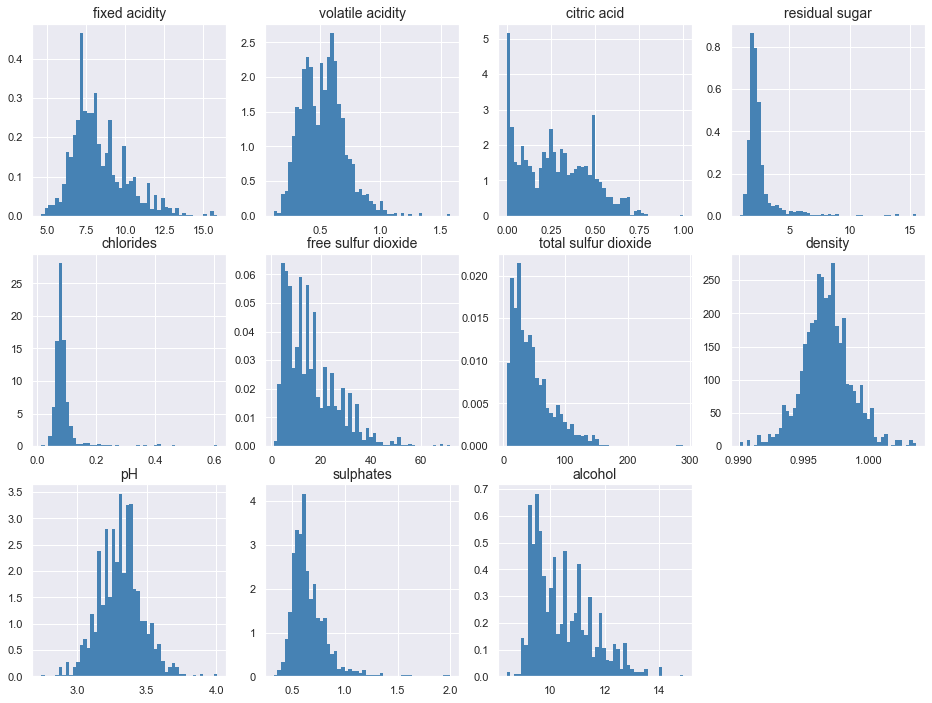

In [29]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)
plt.show()


- Verification d'un autre modèle

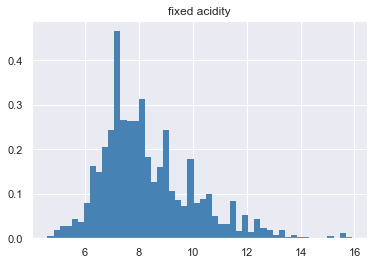

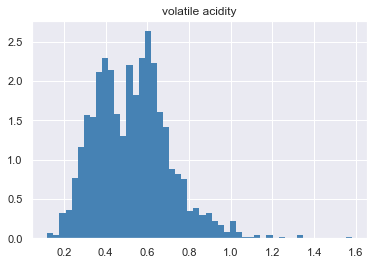

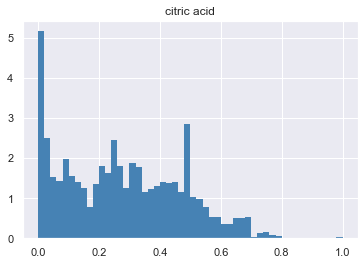

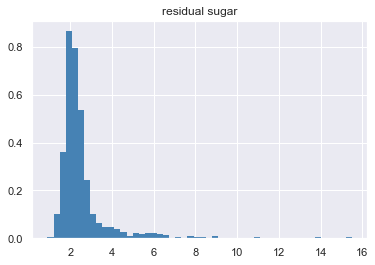

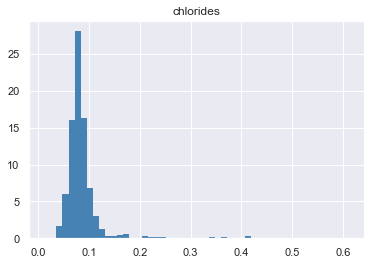

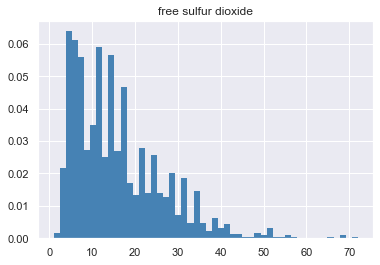

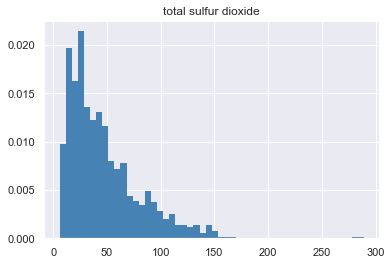

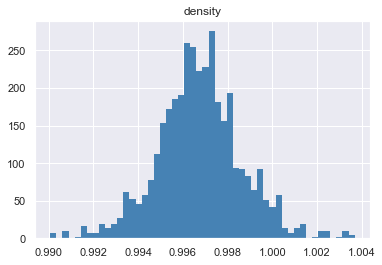

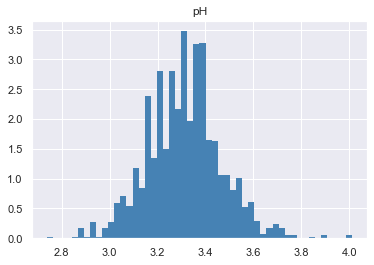

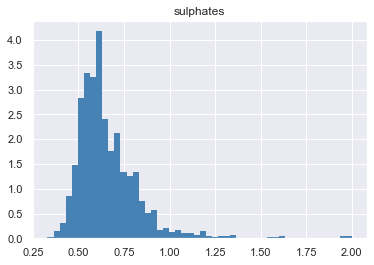

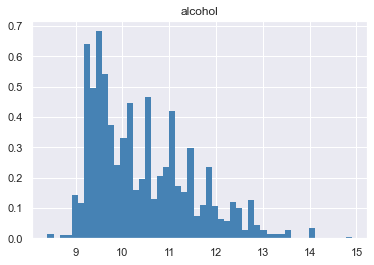

In [35]:

for col in X1.columns:
    plt.hist(X1[col], density=True, bins = 50, edgecolor='none', color='steelblue')
    plt.title(col)
    plt.show()


- Création des classes de Vins

In [36]:
y_class = np.where(y<6,0,1)

- Séparation du jeux de données en Trainset et Testset

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y_class,train_size=0.3,random_state=1)

- Standardisation des données

In [44]:
normalizer = StandardScaler()
X_train_std = normalizer.fit_transform(X_train)
X_test_std = normalizer.fit_transform(X_test)

- Validation Croisée Avec KNN

In [46]:
# Fixation des valeurs de l'hyperparamètre a testé
param_grid = {'n_neighbors':[3,5,7,9,11,13,15]}
# Choix du Score à Optimiser
score = 'accuracy'
model = KNeighborsClassifier()

#Création du model
clf = GridSearchCV(model,param_grid,cv=5,scoring=score)
clf.fit(X_train_std,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

- Affichage des paramètres Optimaux

In [47]:
print('Meilleurs paramètre Optimaux sur le jeux d\'entrainement')
print(clf.best_params_)

Meilleurs paramètre Optimaux sur le jeux d'entrainement
{'n_neighbors': 3}


In [48]:
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.697 (+/-0.088) for {'n_neighbors': 3}
accuracy = 0.676 (+/-0.093) for {'n_neighbors': 5}
accuracy = 0.660 (+/-0.065) for {'n_neighbors': 7}
accuracy = 0.666 (+/-0.071) for {'n_neighbors': 9}
accuracy = 0.649 (+/-0.052) for {'n_neighbors': 11}
accuracy = 0.674 (+/-0.051) for {'n_neighbors': 13}
accuracy = 0.681 (+/-0.052) for {'n_neighbors': 15}


- Vérification des performance sur le jeu de test

In [49]:
y_pred = clf.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))



Sur le jeu de test : 0.699
